# Unified Mentor Data Analytics Internship Project

# AMAZON SALES ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\Garima Rajput\Downloads\Amazon Sales data.csv")

In [3]:
dataset.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.0,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.8,328376.44,248406.36


In [4]:
dataset.shape

(100, 14)

# Data Cleaning

In [5]:
dataset.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
#convert order date to date time
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"])

In [8]:
#Extract year and month from order date 
dataset["Year"] = dataset["Order Date"].dt.year
dataset["Month"] = dataset["Order Date"].dt.month
dataset.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5


# Data Analysis

In [10]:
#calculate the number of regions
regions = dataset["Region"].nunique()
print("Number of Regions:", regions)

Number of Regions: 7


In [11]:
#calculate the number of country
country = dataset["Country"].nunique()
print("Number of Country:", country)

Number of Country: 76


In [12]:
#calculate the number of Item type
itemtype = dataset["Item Type"].nunique()
print("Number of Item Type:", itemtype)

Number of Item Type: 12


In [13]:
#calculate total units sold
unitssold = dataset["Units Sold"].sum()
print("Total Units Sold:", unitssold)

Total Units Sold: 512871


In [15]:
#calculate total unit cost
unitcost = dataset["Unit Cost"].sum()
print("Total Unit Cost:", unitcost)

Total Unit Cost: 19104.8


In [16]:
#calculate total unit price
unitprice = dataset["Unit Price"].sum()
print("Total Unit Price:", unitprice)

Total Unit Price: 27676.13


In [17]:
#calculate total revenue
totalrevenue = dataset["Total Revenue"].sum()
print("Total Revenue:", totalrevenue)

Total Revenue: 137348768.31


In [18]:
#calculate total cost
totalcost = dataset["Total Cost"].sum()
print("Total Cost:", totalcost)

Total Cost: 93180569.91000001


In [19]:
#calculate total profit
totalprofit = dataset["Total Profit"].sum()
print("Total Profit:", totalprofit)

Total Profit: 44168198.39999999


In [20]:
dataset.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

# Data Visualisation

Text(0, 0.5, 'Total Revenue')

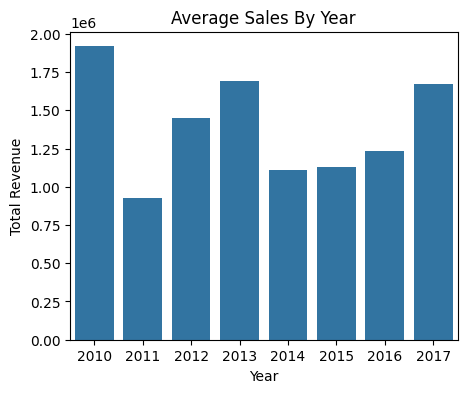

In [21]:
#year wise sales
year_sales = dataset.groupby("Year")["Total Revenue"].mean()
plt.figure(figsize=(5,4))
sns.barplot(x=year_sales.index,y=year_sales.values,)
plt.title("Average Sales By Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")

Text(0.5, 1.0, 'Average Profit in Region Wise')

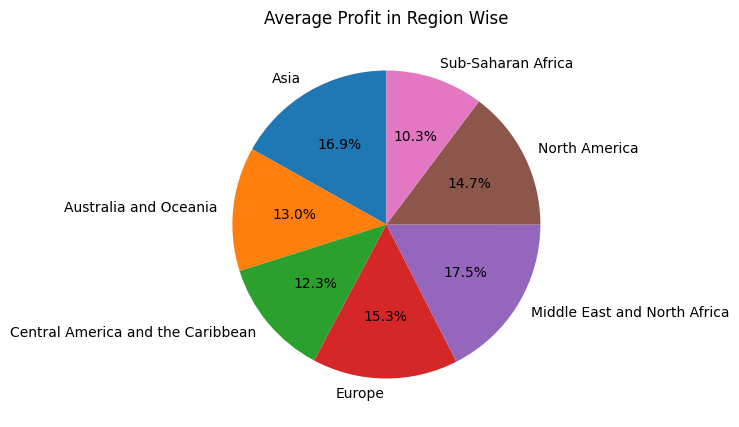

In [22]:
#pie chart of total profit in region wise
plt.figure(figsize=(5,5))
region_TotalRevenue = dataset.groupby("Region")["Total Profit"].mean()
plt.pie(region_TotalRevenue,startangle=90,labels=region_TotalRevenue.index,autopct='%1.1f%%')
plt.title("Average Profit in Region Wise")

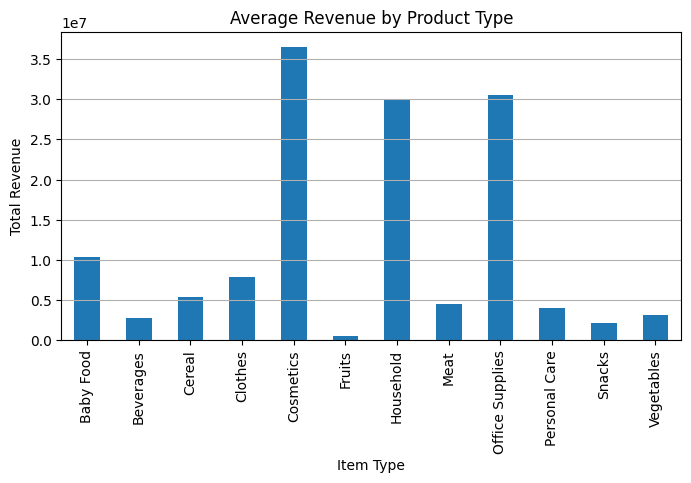

In [23]:
#group total revenueby item type
TotalRevenue_ItemType = dataset.groupby("Item Type")["Total Revenue"].sum()


#bar chart for total revenue by item type
plt.figure(figsize=(8,4))
TotalRevenue_ItemType.plot(kind='bar')
plt.xlabel("Item Type")
plt.ylabel("Total Revenue")
plt.title("Average Revenue by Product Type")
plt.grid(axis="y")

Text(0.5, 1.0, 'Total Revenue by Sales Channel')

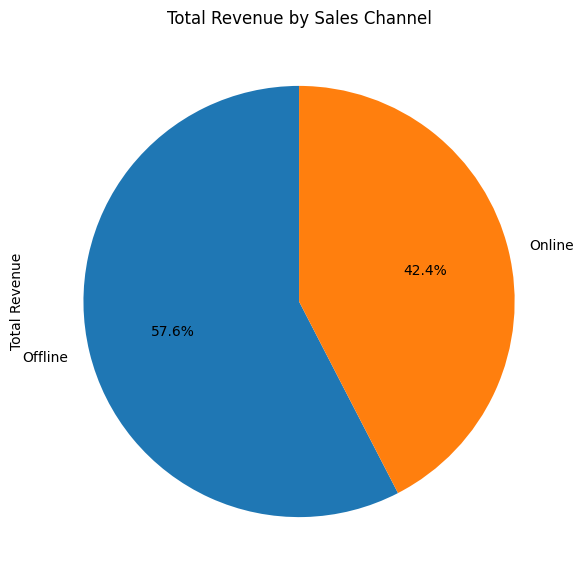

In [25]:
#group total revenue by sales Channel
TotalRevenue_SalesChannel = dataset.groupby("Sales Channel")["Total Revenue"].sum()


#bar chart for total revenue by item type
plt.figure(figsize=(7,7))
plt.tight_layout()
TotalRevenue_SalesChannel.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title("Total Revenue by Sales Channel")

(-1.0999999530116766,
 1.0999990132545814,
 -1.0999995737000883,
 1.0999999797000042)

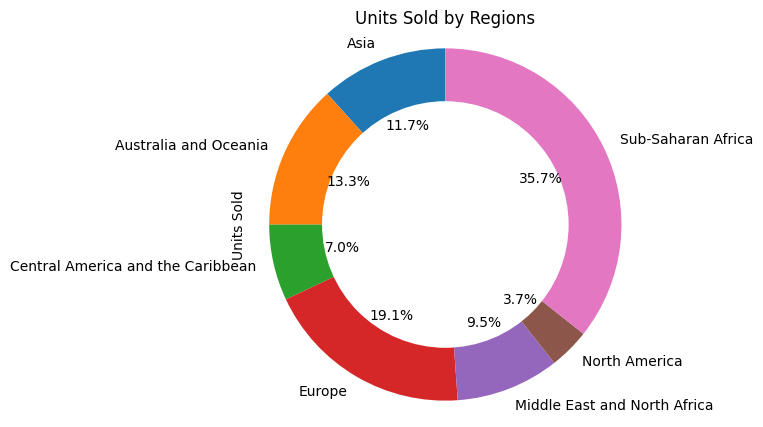

In [27]:
#create a pie chart for a donut chart
Region_UnitSold = dataset.groupby("Region")["Units Sold"].sum()
plt.figure(figsize=(5,5))
Region_UnitSold.plot(kind="pie",labels=Region_UnitSold.index, autopct='%1.1f%%', startangle=90)


#draw a circle at the centre of the pie chart
cntr_circle = plt.Circle((0,0),(0.70),fc='white')
fig = plt.gcf()
fig.gca().add_artist(cntr_circle)


#Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Units Sold by Regions")
plt.axis("equal")

In [28]:
#group units sold by Year and Month
YearMonth_UnitsSold = dataset.groupby(['Year','Month'])['Units Sold'].sum()

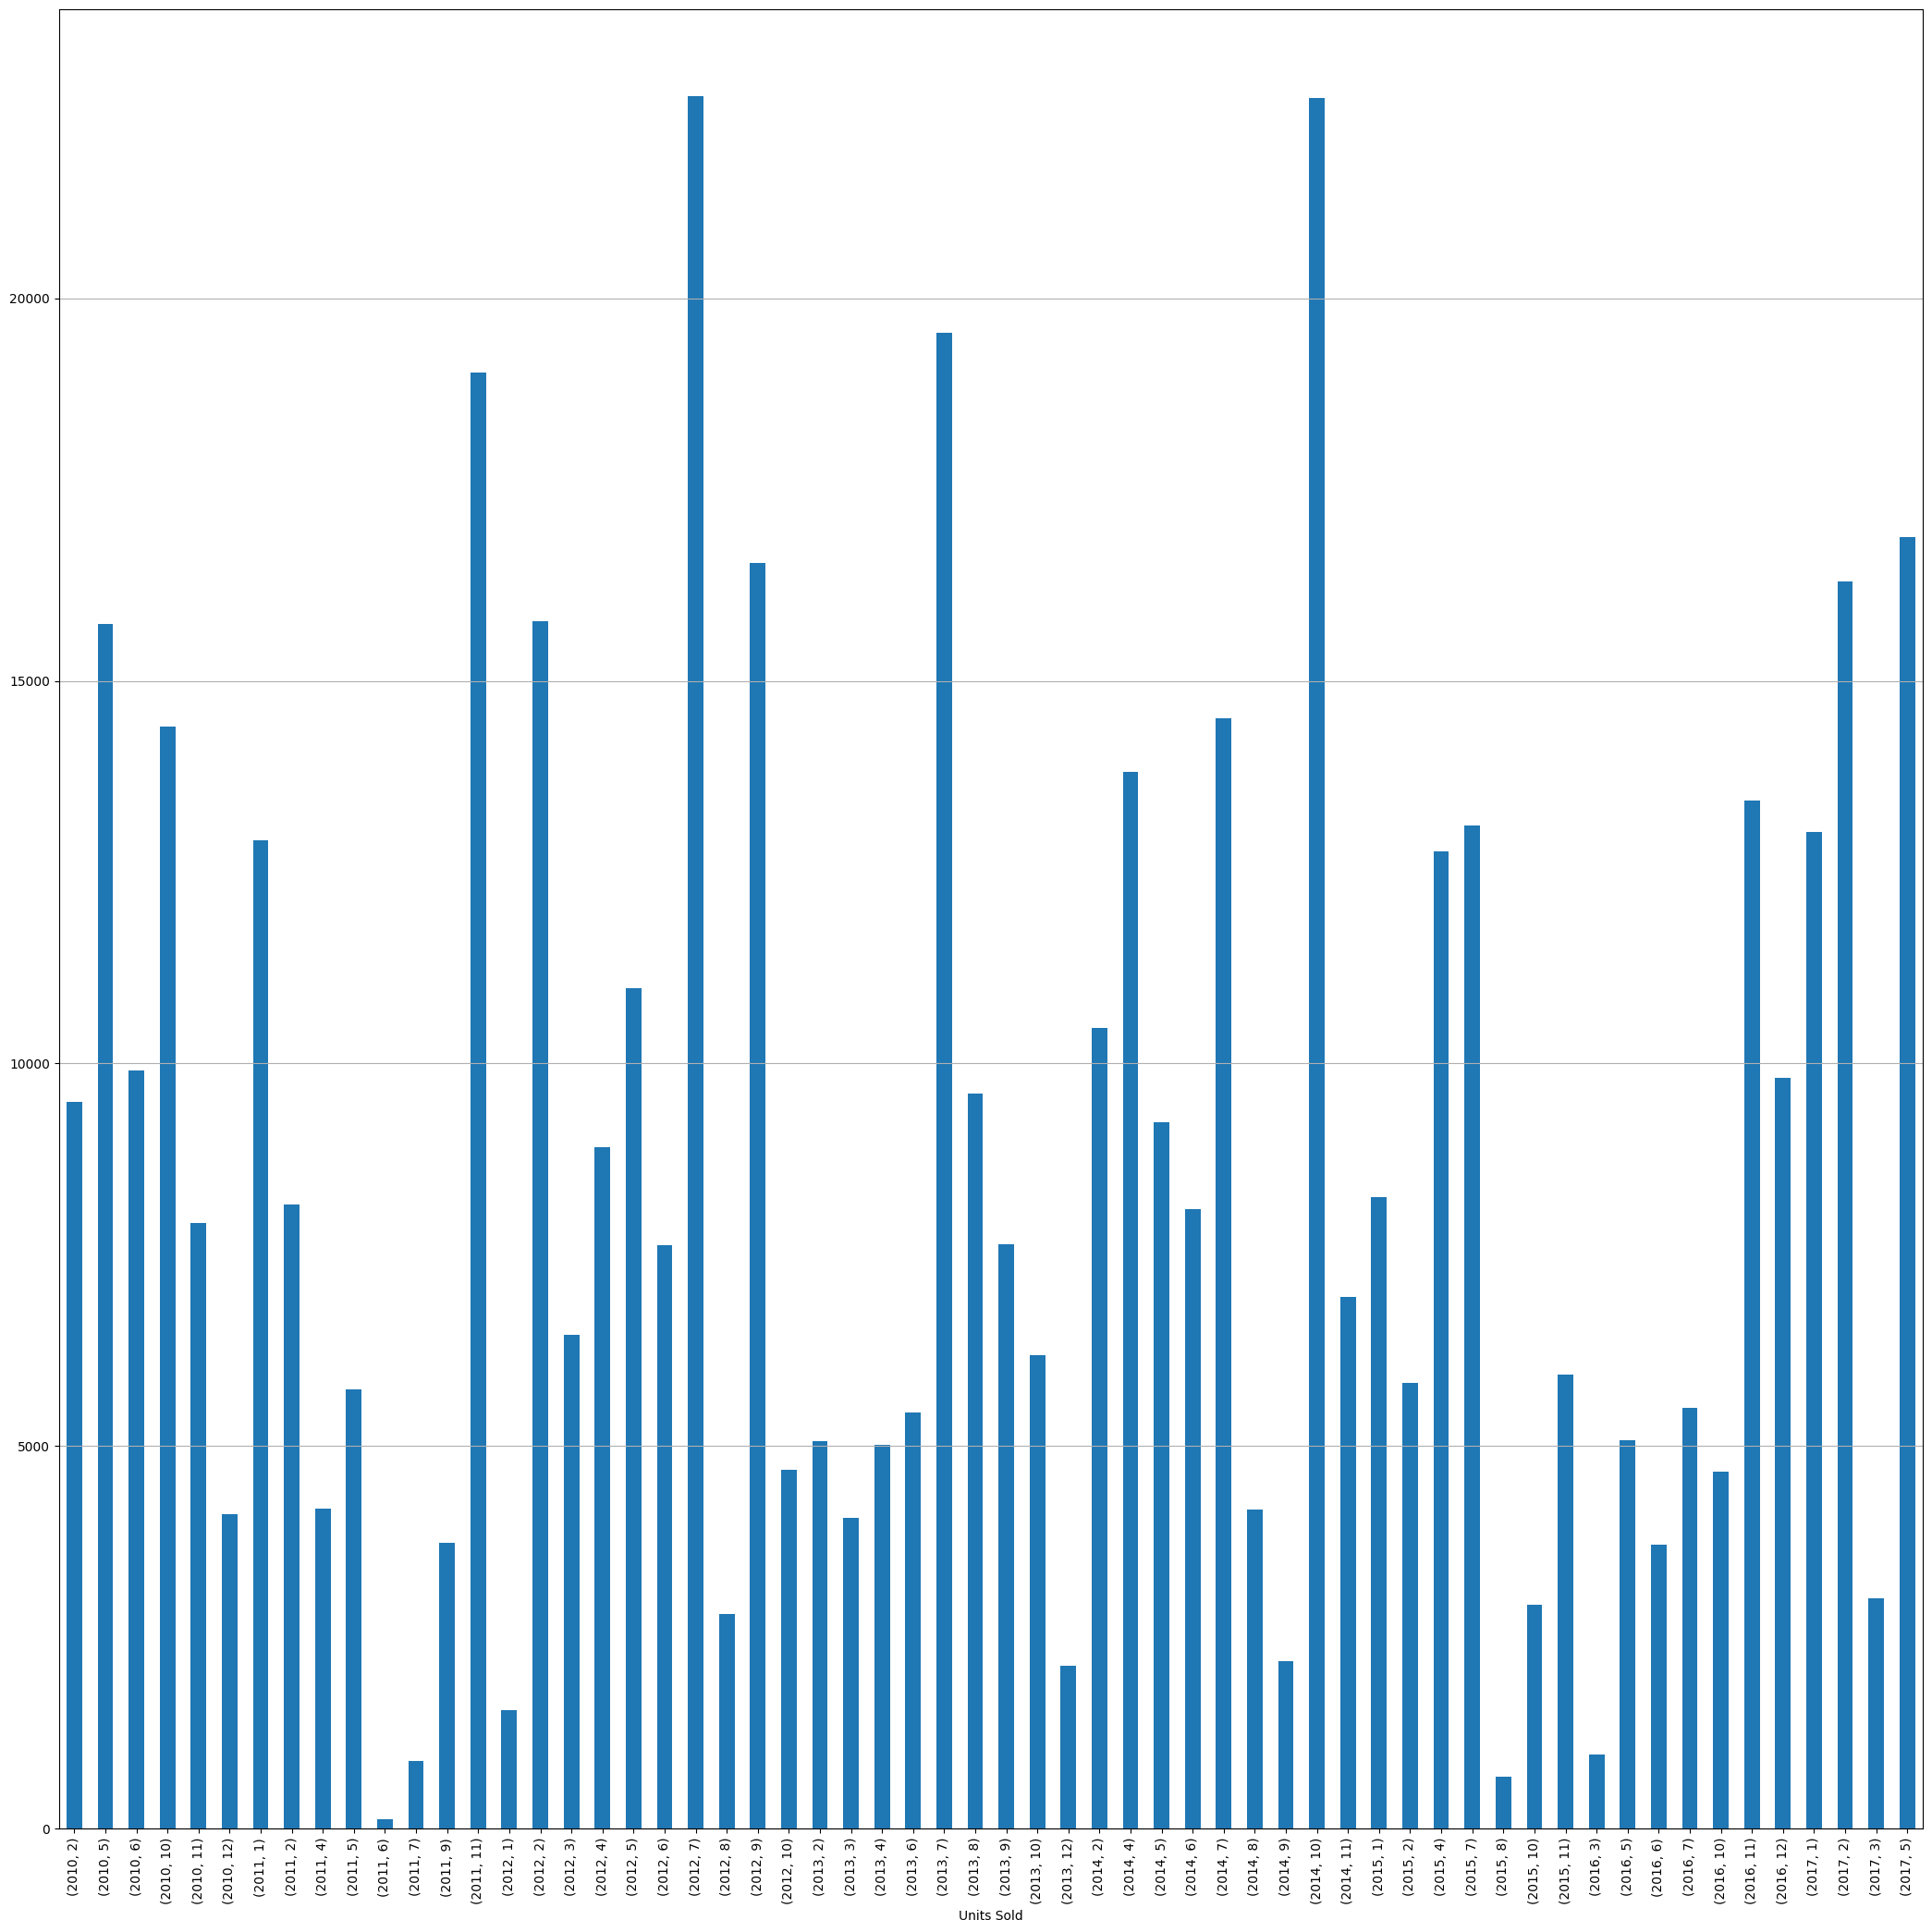

In [30]:
#create a bar chart for units sold by year and month
plt.figure(figsize=(21,21))
YearMonth_UnitsSold.plot(kind="bar")
plt.xlabel('Year and Month')
plt.xlabel('Units Sold')
plt.tight_layout()
plt.grid(axis="y")

In [32]:
#group total cost by sales chaneel
TotalCost_SalesChannel = dataset.groupby("Sales Channel")["Total Cost"].sum()

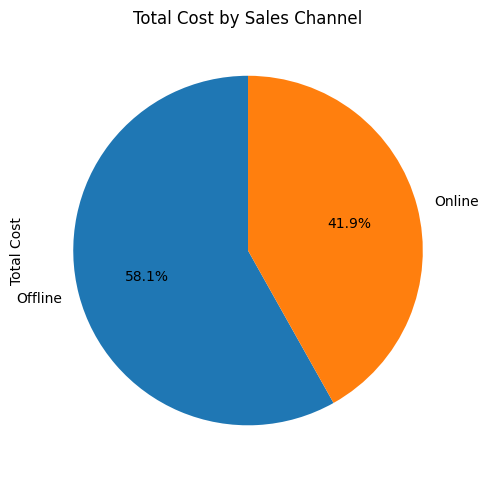

In [34]:
#bar chart for total cost by sales channel
plt.figure(figsize=(5,5))
TotalCost_SalesChannel.plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.title("Total Cost by Sales Channel")
plt.tight_layout()

Text(0, 0.5, 'Units Sold')

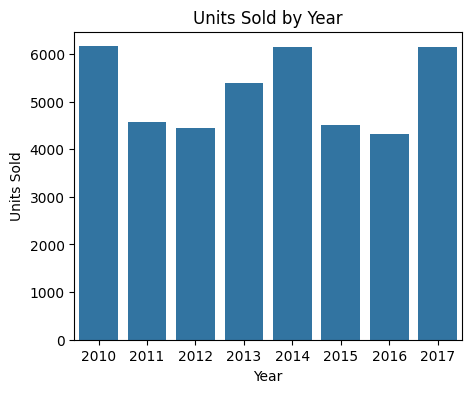

In [35]:
#units sold by year
year_unitssold = dataset.groupby("Year")["Units Sold"].mean()
plt.figure(figsize=(5,4))
sns.barplot(x=year_unitssold.index,y=year_unitssold.values,)
plt.title("Units Sold by Year")
plt.xlabel("Year")
plt.ylabel("Units Sold")

Text(0, 0.5, 'Total Revenue')

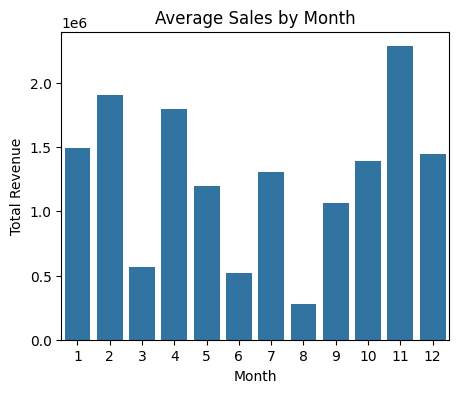

In [36]:
#Month wise sales
month_sales = dataset.groupby("Month")["Total Revenue"].mean()
plt.figure(figsize=(5,4))
sns.barplot(x=month_sales.index,y=month_sales.values,)
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")